# ALGORITMOS DE APRENDIZAJE SUPERVISADO "REGRESION LINEAL"

### Cargamos las librerias requeridas:

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import decimal

from pandas import DataFrame
from matplotlib import pyplot as plt
from decimal import Decimal
from sklearn import metrics
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

from sklearn.preprocessing import MinMaxScaler

### Cargamos nuestra base de datos previamente consolidadas las 4 db en KNIME:

In [184]:
dblineal = pd.read_csv('C:/Users/Juan2/Downloads/Anexo 2 - Dataset Vehicle/Car details v5.csv')

In [185]:
dblineal.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_price,mileage,...,torque,seats,model,location,color,drive_train,Length,width,height,fuel_capacity
0,Maruti 800 AC,2007,60000.0,70000,Petrol,Individual,Manual,First Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0
1,Maruti Wagon R LXI Minor,2007,135000.0,50000,Petrol,Individual,Manual,First Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0
2,Hyundai Verna 1.6 SX,2012,600000.0,100000,Diesel,Individual,Manual,First Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0
3,Datsun RediGO T Option,2017,250000.0,46000,Petrol,Individual,Manual,First Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0
4,Honda Amaze VX i-DTEC,2014,450000.0,141000,Diesel,Individual,Manual,Second Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0
5,Maruti Alto LX BSIII,2007,140000.0,125000,Petrol,Individual,Manual,First Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0
6,Hyundai Xcent 1.2 Kappa S,2016,550000.0,25000,Petrol,Individual,Manual,First Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0
7,Tata Indigo Grand Petrol,2014,240000.0,60000,Petrol,Individual,Manual,Second Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0
8,Hyundai Creta 1.6 VTVT S,2015,850000.0,25000,Petrol,Individual,Manual,First Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0
9,Maruti Celerio Green VXI,2017,365000.0,78000,CNG,Individual,Manual,First Owner,6.4,18.9 kmpl,...,190Nm@ 2000rpm,5,Modelo_Prueba,Ubicacion_Prueba,Color_Prueba,FWD,4370,1770,1545,50.0


In [190]:
dblineal.describe()

,year,selling_price,km_driven,current_price,seats,Length,width,height,fuel_capacity
count,14828.000000,1.482800e+04,1.482800e+04,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000
mean,2013.955692,7.338985e+05,6.593197e+04,6.424937,5.263421,4358.006946,1769.729835,1551.287901,50.262766
std,4.121330,1.195352e+06,5.404873e+04,1.241719,0.785958,165.085515,49.609569,52.387746,5.514324
min,1983.000000,1.000000e-01,0.000000e+00,0.320000,2.000000,3099.000000,1475.000000,1165.000000,15.000000
25%,2012.000000,2.500000e+05,3.200000e+04,6.400000,5.000000,4370.000000,1770.000000,1545.000000,50.000000
50%,2015.000000,4.500000e+05,6.000000e+04,6.400000,5.000000,4370.000000,1770.000000,1545.000000,50.000000
75%,2017.000000,7.150000e+05,9.000000e+04,6.400000,5.000000,4370.000000,1770.000000,1545.000000,50.000000
max,2022.000000,3.500000e+07,2.360457e+06,92.600000,14.000000,5569.000000,2220.000000,1995.000000,105.000000


### Analisis exploratorio de datos "previo proceso realizado en KNIME"

Text(0.5, 1.0, 'Identificacion de datos atipicos - año')

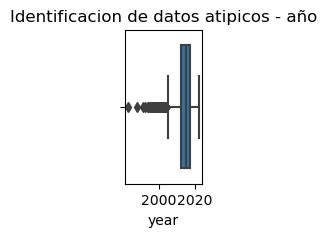

In [191]:
plt.figure(figsize=(1,2))
sns.boxplot(x=dblineal['year'])
plt.title('Identificacion de datos atipicos - año', fontsize=12)

In [192]:
dblineal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           14828 non-null  object 
 1   year           14828 non-null  int64  
 2   selling_price  14828 non-null  float64
 3   km_driven      14828 non-null  int64  
 4   fuel           14828 non-null  object 
 5   seller_type    14828 non-null  object 
 6   transmission   14828 non-null  object 
 7   owner          14828 non-null  object 
 8   current_price  14828 non-null  float64
 9   mileage        14828 non-null  object 
 10  engine         14828 non-null  object 
 11  max_power      14828 non-null  object 
 12  torque         14828 non-null  object 
 13  seats          14828 non-null  int64  
 14  model          14828 non-null  object 
 15  location       14828 non-null  object 
 16  color          14828 non-null  object 
 17  drive_train    14828 non-null  object 
 18  Length

Text(0.5, 1.0, 'Identificacion de datos atipicos - precio actual')

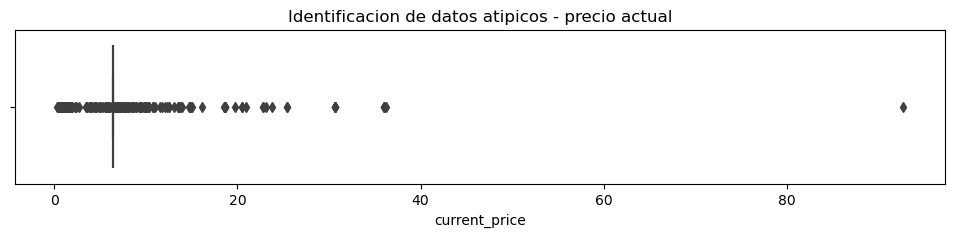

In [193]:
plt.figure(figsize=(12,2))
sns.boxplot(x=dblineal['current_price'])
plt.title('Identificacion de datos atipicos - precio actual', fontsize=12)

Text(0.5, 1.0, 'Identificacion de datos atipicos - precio venta')

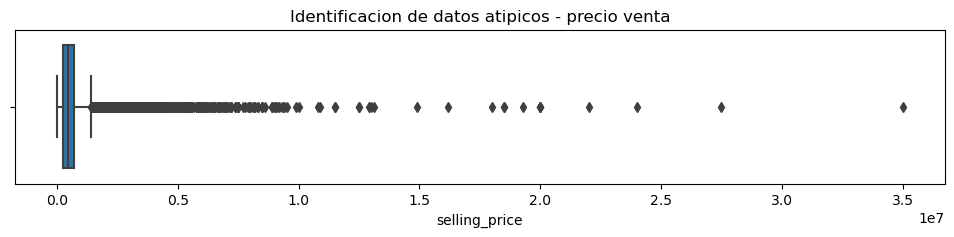

In [194]:
plt.figure(figsize=(12,2))
sns.boxplot(x=dblineal['selling_price'])
plt.title('Identificacion de datos atipicos - precio venta', fontsize=12)

Text(0.5, 1.0, 'Identificacion de datos atipicos - kilometros recorridos')

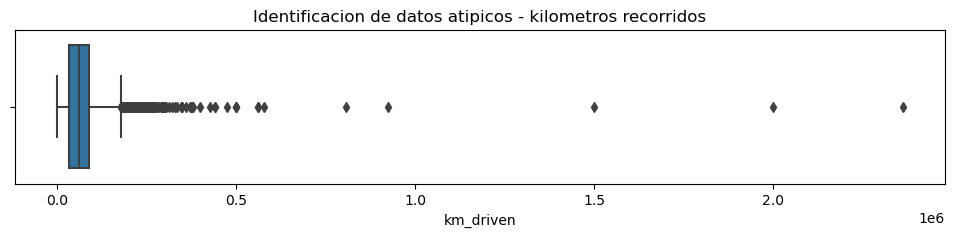

In [195]:
plt.figure(figsize=(12,2))
sns.boxplot(x=dblineal['km_driven'])
plt.title('Identificacion de datos atipicos - kilometros recorridos', fontsize=12)

Text(0.5, 1.0, 'Identificacion de datos atipicos - ascientos')

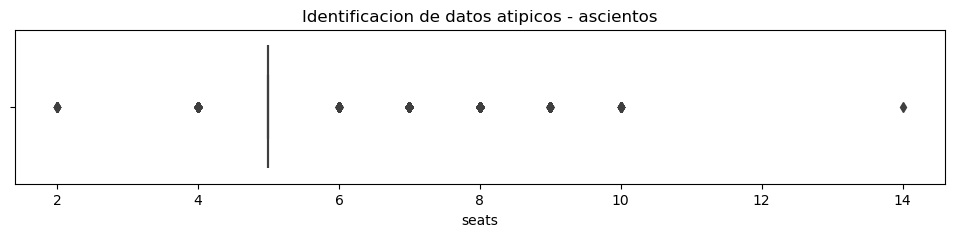

In [196]:
plt.figure(figsize=(12,2))
sns.boxplot(x=dblineal['seats'])
plt.title('Identificacion de datos atipicos - ascientos', fontsize=12)

### Procesamiento de los datos:

In [197]:
print("Precio actual en cero: ",dblineal['current_price'].isin([0]).sum())
print("Kilometros recorridos en cero: ",dblineal['km_driven'].isin([0]).sum())
print("Ascientos en cero: ",dblineal['seats'].isin([0]).sum())
print("Capacidad maxima en cero: ",dblineal['fuel_capacity'].isin([0]).sum())
print("Año de fabricacion en cero: ",dblineal['year'].isin([0]).sum())
print("Precio de venta en cero: ",dblineal['selling_price'].isin([0]).sum())

Precio actual en cero:  0
Kilometros recorridos en cero:  1
Ascientos en cero:  0
Capacidad maxima en cero:  0
Año de fabricacion en cero:  0
Precio de venta en cero:  0


In [198]:
dblineal['km_driven']=dblineal['km_driven'].replace(0,dblineal['km_driven'].mean())

In [199]:
print("Kilometros recorridos en cero: ",dblineal['km_driven'].isin([0]).sum())

Kilometros recorridos en cero:  0


In [200]:
dblineal.loc[dblineal['current_price'] < 4, 'current_price'] = 4
dblineal.loc[dblineal['selling_price'] < 4, 'selling_price'] = 4

In [201]:

dblineal.loc[dblineal['current_price'] == dblineal['current_price'], 'current_price'] = dblineal['current_price']*100000

### Seleccionar caracteristicas para el modelo:

In [202]:
dblineal['selling_price'].value_counts()

selling_price
300000.0     395
350000.0     342
550000.0     330
600000.0     327
250000.0     323
            ... 
348000.0       1
358000.0       1
1031000.0      1
184000.0       1
4290000.0      1
Name: count, Length: 1146, dtype: int64

In [203]:
dblineal[['selling_price']].head(50)

,selling_price
0,60000.0
1,135000.0
2,600000.0
3,250000.0
4,450000.0
5,140000.0
6,550000.0
7,240000.0
8,850000.0
9,365000.0


### Extraer train y test:

In [204]:
X = dblineal['year']
Y = dblineal['km_driven']

slope, intercept, r, p,std_err = stats.linregress(X, Y)

In [205]:
print("Pendiente (slope)): ", slope)
print("Interceptar (intercept: ", intercept)
print("Coeficiente de correlación (r): ", r)
print("Valor (p): ", p)
print("Error estándar de la estimación (std_err): ", std_err)

Pendiente (slope)):  -5290.744409585126
Interceptar (intercept:  10721261.234895075
Coeficiente de correlación (r):  -0.4034506184772375
Valor (p):  0.0
Error estándar de la estimación (std_err):  98.54535680051342


In [206]:
def regresionLineal(X):
    return slope * X + intercept

In [207]:
mapeo = list(map(regresionLineal, X))

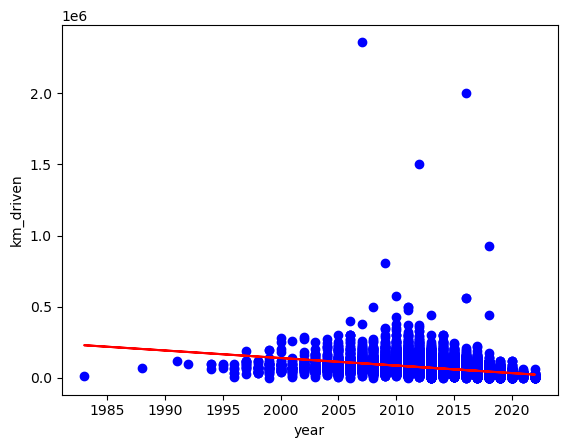

In [208]:
plt.scatter(X, Y, color = "blue")
plt.xlabel('year')
plt.ylabel('km_driven')
plt.plot(x, mapeo, '-r')

In [209]:
plt.clf()
plt.close()
dbrefre = pd.read_csv('C:/Users/Juan2/Downloads/Anexo 2 - Dataset Vehicle/Car details v5.csv', header=0,sep=',');

In [210]:
X = dbrefre[["year", "km_driven"]]
y = dbrefre["selling_price"]

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Entrenamiento del modelo:

In [227]:
modelo_regresion=LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [240]:
Prediccion = modelo_regresion.predict(X_test)

In [241]:
print(y_test)

4183      140000.0
11174    1147000.0
5992      325000.0
6597      400000.0
7237      275000.0
           ...    
11905     600000.0
148       430000.0
4637           4.0
14471     299000.0
7980      790000.0
Name: selling_price, Length: 3707, dtype: float64


In [245]:
print (Prediccion)

[  43600.15959206  848293.50429434  634199.45539674 ...  845691.08025879
  653986.48112169 1188737.68154094]


### Evaluacion del modelo:

In [ ]:
print('Coeficientes: ', modelo_regresion.coef_)
print('Sesgo (Coeficiente W0: ', modelo_regresion.intercept_)
print('Coeficiente W1: ', modelo_regresion.coef_[0])
print('Coeficiente W2: ', modelo_regresion.coef_[1])
print('Coeficiente de determinación: ', modelo_regresion.score(X_train, y_train))

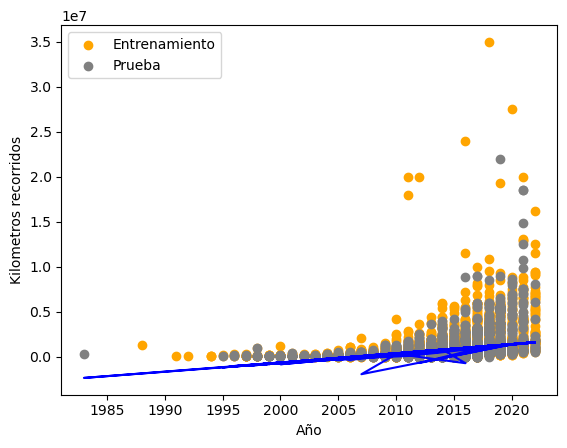

In [232]:
predicciones = modelo_regresion.predict(X_test)
plt.scatter(X_train['year'], y_train, color="orange", label='Entrenamiento')
plt.scatter(X_test['year'], y_test, color="grey", label='Prueba')
plt.plot(X_test['year'], predicciones, color='blue')
plt.xlabel('Año')
plt.ylabel('Kilometros recorridos')
plt.legend()
plt.show()